In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(rc = {"axes.titlesize": 20, "axes.labelsize": 15, "legend.fontsize": 15, \
#               "lines.linewidth": 3, "figure.figsize": (9, 4)})

In [2]:
def create_dataset():
    
    # General a toy dataset:s it's just a straight line with some Gaussian noise:
    xmin, xmax = -5, 5
    n_samples = 100
    np.random.seed(0)
    X = np.random.normal(size=n_samples)
    y = (X > 0).astype(np.float)
    X[X > 0] *= 4
    X += .3 * np.random.normal(size=n_samples)

    X = X[:, np.newaxis]
    
    return X, y


X_train, y_train = create_dataset()

In [3]:
from sklearn.linear_model import LogisticRegression

def train_model(X, y):
    
    # Fit the classifier
    clf = LogisticRegression(C=1e5)
    clf.fit(X, y)
    
    return clf
    

clf = train_model(X_train, y_train)

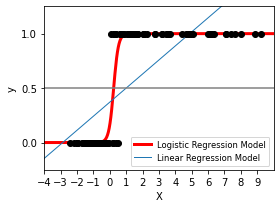

In [4]:
from sklearn.linear_model import LinearRegression
from scipy.special import expit

def plot_training_result(X, y, clf):
    
    # and plot the result
    plt.figure(1, figsize=(4, 3))
    plt.clf()
    plt.scatter(X.ravel(), y, color='black', zorder=20)
    X_test = np.linspace(-5, 10, 300)

    loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
    plt.plot(X_test, loss, color='red', linewidth=3)

    ols = LinearRegression()
    ols.fit(X, y)
    plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
    plt.axhline(.5, color='.5')

    plt.ylabel('y')
    plt.xlabel('X')
    plt.xticks(range(-5, 10))
    plt.yticks([0, 0.5, 1])
    plt.ylim(-.25, 1.25)
    plt.xlim(-4, 10)
    plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
               loc="lower right", fontsize='small')
    plt.tight_layout()
    plt.show()


plot_training_result(X_train, y_train, clf)